### Assignment 2
The goal is to detect whether food reviews (paired with images) are AI-generated or authentic using supervised machine learning techniques.
We are required to use both textual features and image data to train and evaluate models

### Data Preparation

In [1]:
from xml.sax.handler import all_features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('val.csv')

In [3]:
train_df.head()

,ID,text,label,automated_readability_index,difficult_words,flesch_reading_ease,gunning_fog,words_per_sentence,reading_time,ppl,...,cd,td,diag_dom,rot,hpvb,vpvb,hcvb,vcvb,sat,clar
0,9594,Such a big fan of Bodega Negra! I came here wi...,0,6.9,14,80.21,7.48,16.375000,8.23,38.797530,...,53.568900,2.868489,-93.0,-93.0,-7.193224,-18.369119,-0.424541,-0.437290,135.623500,0.259811
1,15465,Title: Hit and Miss at Local Eatery\n\nAs some...,1,13.1,38,51.58,12.94,19.625000,12.12,35.623623,...,140.707590,11.558799,-5.0,-81.0,-17.480599,-8.923278,-0.451880,-0.484037,19.407547,0.189285
2,3721,I recently dined at this gem of a Japanese res...,1,14.0,47,52.70,13.62,18.500000,12.08,34.312195,...,89.987422,0.239884,-25.0,-61.0,-15.080140,-13.399013,-0.509096,-0.461333,127.513199,0.713135
3,19513,Title: A NYC Gem for Theatergoers\n\nIf you fi...,1,11.9,27,61.56,11.65,18.142857,9.61,53.371510,...,166.635662,9.244024,-100.0,-100.0,-12.134820,-10.608154,-0.460336,-0.487629,142.876648,0.330338
4,2284,Title: A Sweet Symphony at Dessert Haven\n\nDe...,1,11.3,29,71.24,10.32,16.875000,10.22,34.229725,...,70.534911,2.094008,-6.0,-86.0,-8.924436,-7.103854,-0.504275,-0.488288,122.347168,0.686020


In [4]:
train_df.shape

(12086, 25)

In [5]:
train_auth_df = train_df[train_df['label'] == 0]

In [6]:
train_auth_df.shape

(6138, 25)

In [7]:
train_ai_df = train_df[train_df['label'] == 1]
train_ai_df.shape
# balanced training data between authentic and ai

(5948, 25)

In [8]:
test_df.head()

,ID,text,label,automated_readability_index,difficult_words,flesch_reading_ease,gunning_fog,words_per_sentence,reading_time,ppl,...,cd,td,diag_dom,rot,hpvb,vpvb,hcvb,vcvb,sat,clar
0,10379,Title: A Comforting Bite in the Bustling Chels...,1,13.3,41,57.50,12.68,22.125000,13.06,45.406254,...,126.571031,7.734258,-84.0,-84.0,-9.534658,-13.406321,-0.478736,-0.479164,116.099304,0.348221
1,1092,Title: A Fusion of Traditional and Trendy: Lit...,1,13.8,66,57.81,12.52,21.846154,21.55,51.546368,...,72.907475,3.755775,-11.0,-69.0,-9.124638,-11.765252,-0.466770,-0.493706,138.977936,0.486588
2,8924,The food is delicious and extremely flavorful....,0,4.6,17,87.82,5.06,8.866667,8.98,31.491344,...,25.088095,2.868782,-87.0,-87.0,-5.179507,-10.939278,-0.427226,-0.399590,127.128667,0.370689
3,1291,"Okay, so I didn't expect much in terms of Kore...",0,11.1,25,74.22,10.89,22.300000,14.87,46.151300,...,57.623184,5.052148,-9.0,-93.0,-0.959575,-9.815594,-0.412599,-0.388622,118.317278,0.128122
4,13927,I recently visited the new Veggie Grill in NYC...,1,5.9,15,82.65,7.39,14.000000,7.10,31.541600,...,75.724269,4.432679,-8.0,-90.0,-19.718303,-14.559374,-0.510795,-0.499236,160.949600,0.358078


In [9]:
test_df.shape

(4030, 25)

In [10]:
test_auth_df = test_df[test_df['label'] == 0]
test_auth_df.shape
# test dataset is balanced

(1986, 25)

In [11]:
val_df.head()

,ID,text,label,automated_readability_index,difficult_words,flesch_reading_ease,gunning_fog,words_per_sentence,reading_time,ppl,...,cd,td,diag_dom,rot,hpvb,vpvb,hcvb,vcvb,sat,clar
0,8473,Title: A Tex-Mex Gem in the Heart of NY\n\nRev...,1,9.9,25,67.79,11.73,20.333333,8.06,27.816364,...,34.301295,3.047547,-95.0,-95.0,-5.004369,-2.242933,-0.480481,-0.482286,130.353531,0.587173
1,19945,On my third day of my birthday tour lands me t...,0,7.5,23,73.98,7.80,14.166667,11.59,100.894390,...,3.618031,4.733772,-26.0,-67.0,-0.525627,-2.499774,-0.703449,-0.568242,139.818117,0.076204
2,18034,Title: A Delightful Dive into Familiar Flavors...,1,14.3,62,51.58,12.65,19.636364,17.44,40.648610,...,166.413024,5.490789,-24.0,-88.0,-1.897878,-6.765047,-0.468379,-0.471397,144.065948,0.710159
3,12483,Everything about this spot is rave worthy. My ...,0,7.8,36,79.90,8.28,16.666667,16.26,55.507442,...,87.969265,0.314994,0.0,-67.0,-0.970034,-2.759893,-0.748109,-0.664823,147.795895,0.043302
4,20613,As someone who isn't typically enamored with p...,1,13.1,26,50.57,14.45,20.600000,7.79,20.933323,...,116.635027,4.674918,0.0,-94.0,-16.995421,-1.717933,-0.473619,-0.444959,105.577576,0.367126


In [12]:
val_df.shape

(4028, 25)

In [13]:
val_auth_df = val_df[val_df['label'] == 0]
val_auth_df.shape
# validation dataset is balanced

(2019, 25)

Training dataset: 12086 rows

Test dataset: 4030 rows

Validation dataset: 4028 rows

Total of 20144

All have 25 columns/features
Each dataset is balanced ~50% are labeled authentic, ~50% are labeled ai generated

### Process Images
Prepare images so we can combine the text features with the image features

In [14]:
import os
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [15]:
# ------------ Configuration -----------------
image_folder = "images"
img_size = (32, 32)


# ----------------- Extract Image Features ----------------
def load_image_features(df, img_folder = image_folder):
    image_features = []
    for idx in df['ID']:
        img_path = os.path.join(img_folder, f"{idx}.jpg")
        with Image.open(img_path) as img:
            img = img.resize(img_size)
            img = img.convert('L')
            img_array = np.array(img).flatten()
            image_features.append(img_array)
    return np.array(image_features)

In [16]:
# Want to exclude ID, label, and text because they are not used in numerical model
text_features_cols = train_df.columns.difference(['ID', 'label', 'text'])
print(text_features_cols)

Index(['automated_readability_index', 'bright', 'cd', 'clar', 'colorf', 'cont',
       'diag_dom', 'difficult_words', 'flesch_reading_ease', 'gunning_fog',
       'hcvb', 'hpvb', 'ppl', 'reading_time', 'rot', 'sat', 'sd', 'td', 'vcvb',
       'vpvb', 'warm', 'words_per_sentence'],
      dtype='object')


In [17]:
# ------------- Extract text features -------------------------
x_train_text = train_df[text_features_cols].values
x_test_text = test_df[text_features_cols].values
x_val_text = val_df[text_features_cols].values

In [18]:
# Load Image Features
x_train_img_features = load_image_features(train_df, image_folder)
x_test_img_features = load_image_features(test_df, image_folder)
x_val_img_features = load_image_features(val_df, image_folder)

In [19]:
# ------------------ Combine text & image features -----------------
x_train = np.concatenate([x_train_text, x_train_img_features], axis = 1)
x_test = np.concatenate([x_test_text, x_test_img_features], axis = 1)
x_val = np.concatenate([x_val_text, x_val_img_features], axis = 1)

x_train_df = pd.DataFrame(x_train)
# x_train_df.to_csv('x_train.csv', index=False)

y_train = train_df['label'].values
y_test = test_df['label'].values
y_val = val_df['label'].values

In [20]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,0
0,0
1,1
2,1
3,1
4,1


In [21]:
# -------------- Normalize Features ------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_val = scaler.transform(x_val)
X_test = scaler.transform(x_test)

### DECISION TREE CLASSIFIER
Perform the following using Decision Tree classifier with up to 2 levels of tree and 5 nodes as a weak classifier. (Decision tree classifier can be used from sklearn)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
weak_dt_classifier = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5)

In [23]:
# Train decision tree
weak_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5)

In [24]:
# Make Predictions
x_train_pred = weak_dt_classifier.predict(X_train)
x_test_pred = weak_dt_classifier.predict(X_test)

In [25]:
# Evaluate performance
print(x_train_pred)
print(y_train)

[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [26]:
print("Training Accuracy: ", accuracy_score(y_train, x_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, x_test_pred))

Training Accuracy:  0.9357934800595731
Test Accuracy:  0.9277915632754342


In [27]:
print("Classification Report (Train Set):")
print(classification_report(y_train, x_train_pred, target_names = ["Authentic", "AI-generated"]))

Classification Report (Train Set):
              precision    recall  f1-score   support

   Authentic       0.92      0.95      0.94      6138
AI-generated       0.95      0.92      0.93      5948

    accuracy                           0.94     12086
   macro avg       0.94      0.94      0.94     12086
weighted avg       0.94      0.94      0.94     12086



### ADABOOST CLASSIFIER
Implement a function for AdaBoost Algorithm which should take N, Train, Test as its parameter. Here N determines the number of rounds of Boosting, Train for Training set. and Test for Testing Set.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

In [29]:
def adaboost_train_predict(N, x_train, y_train, x_test, y_test):
    n_train = x_train.shape[0] 
    weights = np.ones(n_train) / n_train # all weights start out equal at beginning
    
    classifiers = [] # store each weak classifier
    alphas = [] # weights of each classifier
    
    for i in range(N): # repeat N times, each time is a boosting round
        weak_classifier = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, random_state=42)
        
        # training weak classifier with current sample weights
        weak_classifier.fit(x_train, y_train, sample_weight=weights)
        y_pred = weak_classifier.predict(x_train)
        
        # find which samples are wrong
        incorrect = (y_pred != y_train)
        
        # calculate weighted error
        errors = np.sum(weights * incorrect) # wrong predictions matter more if sample weight is high
        if errors == 0:
            errors = 1e-10 # avoid dividing by 0 if perfect accuracy
            
        # compute alpha = influence of this classifier
        alpha = 0.5 * np.log((1 - errors) / errors)
        
        # updating sample weights
        # incorrectly classified samples get more weight, which will be focused on next round
        weights *= np.exp(alpha * incorrect * 2)
        weights /= np.sum(weights) # normalize to sum to 1
        
        # save this round's classifier and it's weights
        classifiers.append(weak_classifier)
        alphas.append(alpha)

    # function to combine all weak learners into final prediction        
    def predict(x):
        final_preds = sum(alpha * weak_classifier.predict(x) for weak_classifier, alpha in zip(classifiers, alphas))
        # weighted vote: if results > 50% of total alpha, predict 1, else 0
        return (final_preds > 0.5 * sum(alphas)).astype(int)
    
    #make final predictions on training and test tests
    x_train_pred = predict(x_train)
    x_test_pred = predict(x_test)
    
    #evaluating accuracy
    train_accuracy = accuracy_score(y_train, x_train_pred)
    test_accuracy = accuracy_score(y_test, x_test_pred)
    
    return {
        'x_train_pred': x_train_pred,
        'x_test_pred': x_test_pred,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_error': 1 - train_accuracy,
        'test_error': 1 - test_accuracy
    }

### 5 fold Cross-Validation
Use 5 fold Cross validation (both stratified and unstratified) for Training Set and report Mean and Standard deviation of accuracy and error rate. Compute accuracy, precision, recall, and F1-score.


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [31]:
def evaluate_adaboost_cv(x, y, n_rounds=10, n_splits = 5):
    """
    
    :param x: feature matrix (in our case, text features + image)
    :param y: labels (0 for authentic, 1 for AI-generated)
    :param n_rounds: Number of boosting rounds (how many weak classifiers to combine)
    :param n_splits: Number of cross-validation folds (5 in our case, can vary if needed)
    :return: dictionary containing mean and std of accuracy, precision, recall, and f1-score
    """
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # dictionary storing metrics
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
    
    # cross validation
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        print(f'\nFold {fold + 1}/{n_splits}')
        
        # split data into training and testing sets for this fold
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        
        # train adaboost and get predictions for both train and test sets
        result = adaboost_train_predict(n_rounds, x_train_cv, y_train_cv, x_test_cv, y_test_cv)
        y_pred_cv = result['x_test_pred']
        
        # calc metrics for this fold
        accuracy = accuracy_score(y_test_cv, y_pred_cv)
        precision = precision_score(y_test_cv, y_pred_cv)
        recall = recall_score(y_test_cv, y_pred_cv)
        f1 = f1_score(y_test_cv, y_pred_cv)
        
        # save metrics for average later
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)
        
        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
        
    # Print mean and std deviation of metrics across all folds
    print(f'=============== Cross-Validation Summary ===============')
    for key in metrics:
        scores = metrics[key]
        print(f'{key.capitalize()}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}')

    return metrics


In [32]:
dt_adaboost_metrics = evaluate_adaboost_cv(x_train, y_train)


Fold 1/5
Accuracy: 0.989247311827957, Precision: 0.9874371859296482, Recall: 0.9907563025210084, F1-Score: 0.9890939597315436

Fold 2/5
Accuracy: 0.9875879189077369, Precision: 0.9817123857024106, Recall: 0.9932716568544996, F1-Score: 0.9874581939799331

Fold 3/5
Accuracy: 0.9904840711625983, Precision: 0.9882747068676717, Recall: 0.992430613961312, F1-Score: 0.990348300461603

Fold 4/5
Accuracy: 0.9913115432354158, Precision: 0.9907640638119227, Recall: 0.9915966386554622, F1-Score: 0.991180176396472

Fold 5/5
Accuracy: 0.9867604468349194, Precision: 0.9948717948717949, Recall: 0.9781512605042016, F1-Score: 0.9864406779661017
=============== Cross-Validation Summary ===============
Accuracy: Mean = 0.9891, Std = 0.0017
Precision: Mean = 0.9886, Std = 0.0043
Recall: Mean = 0.9892, Std = 0.0056
F1_score: Mean = 0.9889, Std = 0.0018


In [33]:
def evaluate_adaboost_unstrat_cv(x, y, n_rounds=10, n_splits = 5):
    """
    
    :param x: feature matrix (in our case, text features + image)
    :param y: labels (0 for authentic, 1 for AI-generated)
    :param n_rounds: Number of boosting rounds (how many weak classifiers to combine)
    :param n_splits: Number of cross-validation folds (5 in our case, can vary if needed)
    :return: dictionary containing mean and std of accuracy, precision, recall, and f1-score
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # dictionary storing metrics
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

    # cross validation
    for fold, (train_index, test_index) in enumerate(kf.split(x)):
        print(f'\nFold {fold + 1}/{n_splits}')

        # split data into training and testing sets for this fold
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        # train adaboost and get predictions for both train and test sets
        result = adaboost_train_predict(n_rounds, x_train_cv, y_train_cv, x_test_cv, y_test_cv)
        y_pred_cv = result['x_test_pred']

        # calc metrics for this fold
        accuracy = accuracy_score(y_test_cv, y_pred_cv)
        precision = precision_score(y_test_cv, y_pred_cv)
        recall = recall_score(y_test_cv, y_pred_cv)
        f1 = f1_score(y_test_cv, y_pred_cv)

        # save metrics for average later
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)

        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

    # Print mean and std deviation of metrics across all folds
    print(f'=============== Cross-Validation Summary ===============')
    for key in metrics:
        scores = metrics[key]
        print(f'{key.capitalize()}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}')

    return metrics

In [34]:
unstrat_dt_adaboost_metrics = evaluate_adaboost_unstrat_cv(x_train, y_train)


Fold 1/5
Accuracy: 0.9896608767576509, Precision: 0.9865996649916248, Recall: 0.9924178601516428, F1-Score: 0.9895002099958001

Fold 2/5
Accuracy: 0.989242863053372, Precision: 0.9875104079933389, Recall: 0.9908103592314118, F1-Score: 0.9891576313594662

Fold 3/5
Accuracy: 0.983864294580058, Precision: 0.9793899422918384, Recall: 0.9883527454242929, F1-Score: 0.9838509316770186

Fold 4/5
Accuracy: 0.9925527513446422, Precision: 0.990748528174937, Recall: 0.9940928270042194, F1-Score: 0.9924178601516428

Fold 5/5
Accuracy: 0.9851055026892842, Precision: 0.985531914893617, Recall: 0.983857264231096, F1-Score: 0.9846938775510204
=============== Cross-Validation Summary ===============
Accuracy: Mean = 0.9881, Std = 0.0032
Precision: Mean = 0.9860, Std = 0.0037
Recall: Mean = 0.9899, Std = 0.0036
F1_score: Mean = 0.9879, Std = 0.0032


### Random Forest
 Train Random Forest (bagging algorithm) on the same dataset and report results on 5 fold cross validation (both stratified and unstratified). Compute accuracy, precision, recall, and F1-score

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
def evaluate_random_forest_cv(x, y, n_splits=5, n_estimators=100, max_depth=None):
    """
    
    :param x: feature matrics (text features + image)
    :param y: labels (0 for authentic, 1 for AI-generated)
    :param n_splits: number of folds for cross validation
    :param n_estimators: number for decision trees in forst
    :param max_depth: max depth of individual trees (none = fully grown trees)
    :return: dictionary with mean and std of accuracy, precision, recall, and f1-score
    """

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # dictionary storing metrics
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

    # cross validation
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        print(f'\nFold {fold + 1}/{n_splits}')

        # split data into training and testing sets for this fold
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
        
        # create and train random forest
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(x_train_cv, y_train_cv)
        
        # predict on test fold
        y_pred = rf.predict(x_test_cv)
        
        # calc and store metrics
        accuracy = accuracy_score(y_test_cv, y_pred)
        precision = precision_score(y_test_cv, y_pred)
        recall = recall_score(y_test_cv, y_pred)
        f1 = f1_score(y_test_cv, y_pred)
        
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)
        
        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
        
    # summary
    print(f'\n========= Random Forest Cross-Validation Summary ===========')
    for key in metrics:
        scores = metrics[key]
        print(f'{key.capitalize()}: Mean {np.mean(scores):.4f}, Std {np.std(scores):.4f}')
        
    return metrics
        

In [37]:
random_forest_metrics = evaluate_random_forest_cv(x_train, y_train)


Fold 1/5
Accuracy: 0.9735318444995864, Precision: 0.973109243697479, Recall: 0.973109243697479, F1-Score: 0.973109243697479

Fold 2/5
Accuracy: 0.9731071576334299, Precision: 0.9636963696369637, Recall: 0.9823380992430614, F1-Score: 0.9729279466888796

Fold 3/5
Accuracy: 0.971038477451386, Precision: 0.9697732997481109, Recall: 0.9714045416316233, F1-Score: 0.9705882352941176

Fold 4/5
Accuracy: 0.9706247414149772, Precision: 0.9597370583401807, Recall: 0.9815126050420168, F1-Score: 0.9705027004570004

Fold 5/5
Accuracy: 0.9764170459247, Precision: 0.9780590717299578, Recall: 0.9739495798319328, F1-Score: 0.976

========= Random Forest Cross-Validation Summary ===========
Accuracy: Mean 0.9729, Std 0.0021
Precision: Mean 0.9689, Std 0.0065
Recall: Mean 0.9765, Std 0.0045
F1_score: Mean 0.9726, Std 0.0020


In [38]:
def evaluate_random_forest_unstrat_cv(x, y, n_splits=5, n_estimators=100, max_depth=None):
    """
    
    :param x: feature matrics (text features + image)
    :param y: labels (0 for authentic, 1 for AI-generated)
    :param n_splits: number of folds for cross validation
    :param n_estimators: number for decision trees in forst
    :param max_depth: max depth of individual trees (none = fully grown trees)
    :return: dictionary with mean and std of accuracy, precision, recall, and f1-score
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # dictionary storing metrics
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }

    # cross validation
    for fold, (train_index, test_index) in enumerate(kf.split(x)):
        print(f'\nFold {fold + 1}/{n_splits}')

        # split data into training and testing sets for this fold
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        # create and train random forest
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(x_train_cv, y_train_cv)

        # predict on test fold
        y_pred = rf.predict(x_test_cv)

        # calc and store metrics
        accuracy = accuracy_score(y_test_cv, y_pred)
        precision = precision_score(y_test_cv, y_pred)
        recall = recall_score(y_test_cv, y_pred)
        f1 = f1_score(y_test_cv, y_pred)

        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1_score'].append(f1)

        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

    # summary
    print(f'\n========= Random Forest Cross-Validation Summary ===========')
    for key in metrics:
        scores = metrics[key]
        print(f'{key.capitalize()}: Mean {np.mean(scores):.4f}, Std {np.std(scores):.4f}')

    return metrics

In [39]:
unstrat_random_forest_metrics = evaluate_random_forest_unstrat_cv(x_train, y_train)


Fold 1/5
Accuracy: 0.9714640198511166, Precision: 0.9666110183639399, Recall: 0.9755686604886268, F1-Score: 0.9710691823899371

Fold 2/5
Accuracy: 0.9805544062887878, Precision: 0.9799666110183639, Recall: 0.9807852965747702, F1-Score: 0.9803757828810021

Fold 3/5
Accuracy: 0.9722796855606123, Precision: 0.963265306122449, Recall: 0.9816971713810316, F1-Score: 0.9723939019365472

Fold 4/5
Accuracy: 0.9718659495242036, Precision: 0.9737065309584394, Recall: 0.9687763713080169, F1-Score: 0.9712351945854484

Fold 5/5
Accuracy: 0.971038477451386, Precision: 0.9655172413793104, Recall: 0.9753610875106202, F1-Score: 0.9704142011834319

========= Random Forest Cross-Validation Summary ===========
Accuracy: Mean 0.9734, Std 0.0036
Precision: Mean 0.9698, Std 0.0062
Recall: Mean 0.9764, Std 0.0046
F1_score: Mean 0.9731, Std 0.0037


### SVM
Train SVM on the same dataset and report results on 5 fold cross validation (both stratified and unstratified). Compute accuracy, precision, recall, and F1-score

In [40]:
from sklearn.svm import SVC

In [41]:
def evaluate_svm_cv(x, y, n_splits=5, kernel='rbf', C=1):
    """
    Evaluate SVM using 5-fold cross-validation.
    :param x: feature matrix (text features + image)
    :param y: labels (0 for authentic, 1 for AI-generated)
    :param n_splits: number of cross validation folds
    :param kernel: svm kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.)
    :param C: regularization parameter (trade off between margin width and misclassification)
    :return: dictionary of mean and std for accuracy, precision, recall, and f1-score
    """

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for fold, (train_idx, test_idx) in enumerate(skf.split(x, y)):
        print(f"\nFold {fold + 1}/{n_splits}")

        x_train_cv, x_test_cv = x[train_idx], x[test_idx]
        y_train_cv, y_test_cv = y[train_idx], y[test_idx]
        
        # creating and training svm model
        svm = SVC(kernel=kernel, C=C)
        svm.fit(x_train_cv, y_train_cv)
        
        # predict on test fold
        y_pred = svm.predict(x_test_cv)
        
        accuracy = accuracy_score(y_test_cv, y_pred)
        precision = precision_score(y_test_cv, y_pred)
        recall = recall_score(y_test_cv, y_pred)
        f1 = f1_score(y_test_cv, y_pred)
        
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)

        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

    # summary
    print(f'\n========= SVM Cross-Validation Summary ===========')
    for key in metrics:
        scores = metrics[key]
        print(f'{key.capitalize()}: Mean {np.mean(scores):.4f}, Std {np.std(scores):.4f}')

    return metrics
        

In [42]:
evaluate_svm_cv(x_train, y_train)


Fold 1/5


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [43]:
print("Number of NaNs: ", np.isnan(x_train).sum())

Number of NaNs:  86


In [44]:
# Find which rows contain NaNs
nan_rows = x_train_df[x_train_df.isnull().any(axis=1)]
print("Rows with NaNs:\n", nan_rows)

# See percentage of NaN-containing rows
print(f"Percentage of rows with NaNs: {len(nan_rows) / len(x_train_df) * 100:.2f}%")

Rows with NaNs:
        0           1           2         3           4          5      6     \
525     4.0  146.784198         NaN  0.256142  126.572606  44.696375   -7.0   
1192    9.0  243.527767  322.234591  0.942389   98.872866  41.573465    NaN   
2661    4.8  175.530031         NaN  0.636389  133.940294  48.525405  -39.0   
3165    9.8  102.110703         NaN  0.263580  144.192725  79.811225  -93.0   
3422   15.2  184.636142         NaN  0.643086  169.988323  40.422980   -5.0   
4103   11.1  123.041214         NaN  0.218826  152.167493  63.549944  -66.0   
4242    5.8  139.854630         NaN  0.275000  143.868069  55.786186   -3.0   
4295   12.5  103.853592         NaN  0.214233  147.721190  73.464022  -67.0   
4306    5.1  151.875463         NaN  0.348611  142.921966  61.850404  -63.0   
4363    9.9  142.778611         NaN  0.270926  163.146963  48.515792   -7.0   
4455    5.5  157.936420         NaN  0.430556  130.587586  59.235822  -53.0   
5337    5.1  183.122870         NaN

In [45]:
#only a small number of NaNs
# can drop them

x_train_clean = x_train_df.dropna().values
y_train_clean = y_train[x_train_df.dropna().index]

In [46]:
svm_metrics = evaluate_svm_cv(x_train_clean, y_train_clean)


Fold 1/5
Accuracy: 0.8101160862354893, Precision: 0.819614711033275, Recall: 0.7878787878787878, F1-Score: 0.8034334763948497

Fold 2/5
Accuracy: 0.8129406885109913, Precision: 0.8108108108108109, Recall: 0.8087615838247684, F1-Score: 0.8097849008857022

Fold 3/5
Accuracy: 0.8125259228535877, Precision: 0.8198433420365535, Recall: 0.793597304128054, F1-Score: 0.8065068493150684

Fold 4/5
Accuracy: 0.814184985483202, Precision: 0.8130287648054145, Recall: 0.8089225589225589, F1-Score: 0.810970464135021

Fold 5/5
Accuracy: 0.8075487349647449, Precision: 0.8169877408056042, Recall: 0.7853535353535354, F1-Score: 0.8008583690987124

========= SVM Cross-Validation Summary ===========
Accuracy: Mean 0.8115, Std 0.0024
Precision: Mean 0.8161, Std 0.0036
Recall: Mean 0.7969, Std 0.0101
F1: Mean 0.8063, Std 0.0038


In [47]:
def evaluate_svm_unstrat_cv(x, y, n_splits=5, kernel='rbf', C=1):
    """
    Evaluate SVM using 5-fold cross-validation.
    :param x: feature matrix (text features + image)
    :param y: labels (0 for authentic, 1 for AI-generated)
    :param n_splits: number of cross validation folds
    :param kernel: svm kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.)
    :param C: regularization parameter (trade off between margin width and misclassification)
    :return: dictionary of mean and std for accuracy, precision, recall, and f1-score
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': []
    }

    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        print(f"\nFold {fold + 1}/{n_splits}")

        x_train_cv, x_test_cv = x[train_idx], x[test_idx]
        y_train_cv, y_test_cv = y[train_idx], y[test_idx]

        # creating and training svm model
        svm = SVC(kernel=kernel, C=C)
        svm.fit(x_train_cv, y_train_cv)

        # predict on test fold
        y_pred = svm.predict(x_test_cv)

        accuracy = accuracy_score(y_test_cv, y_pred)
        precision = precision_score(y_test_cv, y_pred)
        recall = recall_score(y_test_cv, y_pred)
        f1 = f1_score(y_test_cv, y_pred)

        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)

        print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

    # summary
    print(f'\n========= SVM Cross-Validation Summary ===========')
    for key in metrics:
        scores = metrics[key]
        print(f'{key.capitalize()}: Mean {np.mean(scores):.4f}, Std {np.std(scores):.4f}')

    return metrics

In [48]:
unstrat_svm_metrics = evaluate_svm_unstrat_cv(x_train_clean, y_train_clean)


Fold 1/5
Accuracy: 0.8117744610281924, Precision: 0.8075571177504394, Recall: 0.7963604852686309, F1-Score: 0.8019197207678883

Fold 2/5
Accuracy: 0.8158440481128163, Precision: 0.8242894056847545, Recall: 0.7994987468671679, F1-Score: 0.811704834605598

Fold 3/5
Accuracy: 0.8311903774367483, Precision: 0.8449014567266495, Recall: 0.8135313531353136, F1-Score: 0.8289197141656158

Fold 4/5
Accuracy: 0.8050601410203235, Precision: 0.811704834605598, Recall: 0.7941908713692946, F1-Score: 0.8028523489932886

Fold 5/5
Accuracy: 0.8129406885109913, Precision: 0.8145231846019247, Recall: 0.7957264957264957, F1-Score: 0.8050151318633809

========= SVM Cross-Validation Summary ===========
Accuracy: Mean 0.8154, Std 0.0087
Precision: Mean 0.8206, Std 0.0133
Recall: Mean 0.7999, Std 0.0070
F1: Mean 0.8101, Std 0.0100


In [49]:
print(unstrat_svm_metrics)

{'accuracy': [0.8117744610281924, 0.8158440481128163, 0.8311903774367483, 0.8050601410203235, 0.8129406885109913], 'precision': [0.8075571177504394, 0.8242894056847545, 0.8449014567266495, 0.811704834605598, 0.8145231846019247], 'recall': [0.7963604852686309, 0.7994987468671679, 0.8135313531353136, 0.7941908713692946, 0.7957264957264957], 'f1': [0.8019197207678883, 0.811704834605598, 0.8289197141656158, 0.8028523489932886, 0.8050151318633809]}


### Comparative Analysis and Interpretation
Compare classification performance of Bagging, Boosting, and SVM using accuracy, precision, recall, and F1-score. Plot the graphs representing each of these metrics 

Discuss which evaluation metric is most suitable given the dataset's class distribution

For each of the models, compare the performance between stratified 5-fold and unstratified 5-fold (only using the most suitable metric). Explain the intuition behind such difference in the performance. if one is higher than the other, you should explain why

Explain why one model outperformed other models. Provide insights on strengths and weaknesses of each model based on your results 

In [50]:
import seaborn as sns

In [54]:
# function to summarize data it metrics lists for each model

def summarize(metrics_dict, model_name, strat_name):
    return [
        {
            'Model': model_name,
            'Strategy': strat_name,
            'Metric': metric,
            'Score': np.mean(scores)
        }
        for metric, scores in metrics_dict.items()
    ]

all_metrics = []
all_metrics += summarize(dt_adaboost_metrics, 'AdaBoost DT', strat_name='Stratified')
all_metrics += summarize(unstrat_dt_adaboost_metrics, 'AdaBoost DT', strat_name='Unstratified')
all_metrics += summarize(random_forest_metrics, 'Random Forest', strat_name='Stratified')
all_metrics += summarize(unstrat_random_forest_metrics, 'Random Forest', strat_name='Unstratified')
all_metrics += summarize(svm_metrics, 'SVM', strat_name='Stratified')
all_metrics += summarize(unstrat_svm_metrics, 'SVM', strat_name='Unstratified')

In [55]:
print(all_metrics)

[{'Model': 'AdaBoost DT', 'Strategy': 'Stratified', 'Metric': 'accuracy', 'Score': np.float64(0.9890782583937255)}, {'Model': 'AdaBoost DT', 'Strategy': 'Stratified', 'Metric': 'precision', 'Score': np.float64(0.9886120274366895)}, {'Model': 'AdaBoost DT', 'Strategy': 'Stratified', 'Metric': 'recall', 'Score': np.float64(0.9892412944992968)}, {'Model': 'AdaBoost DT', 'Strategy': 'Stratified', 'Metric': 'f1_score', 'Score': np.float64(0.9889042617071307)}, {'Model': 'AdaBoost DT', 'Strategy': 'Unstratified', 'Metric': 'accuracy', 'Score': np.float64(0.9880852576850014)}, {'Model': 'AdaBoost DT', 'Strategy': 'Unstratified', 'Metric': 'precision', 'Score': np.float64(0.9859560916690713)}, {'Model': 'AdaBoost DT', 'Strategy': 'Unstratified', 'Metric': 'recall', 'Score': np.float64(0.9899062112085325)}, {'Model': 'AdaBoost DT', 'Strategy': 'Unstratified', 'Metric': 'f1_score', 'Score': np.float64(0.9879241021469897)}, {'Model': 'Random Forest', 'Strategy': 'Stratified', 'Metric': 'accuracy'

In [56]:
df_all_metrics = pd.DataFrame(all_metrics)

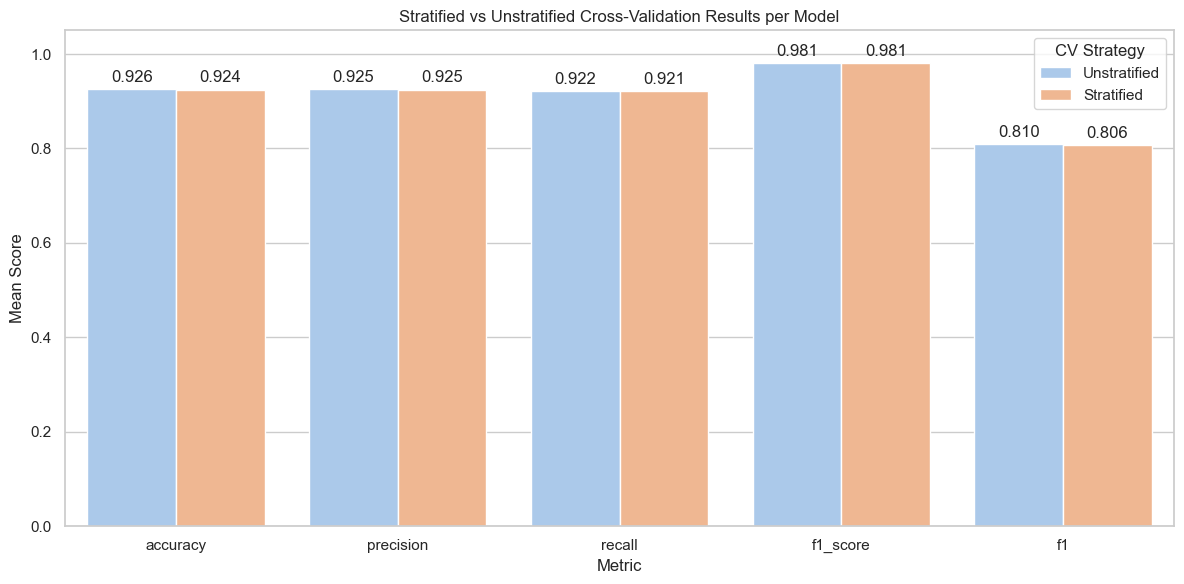

In [58]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_all_metrics,
    x='Metric',
    y='Score',
    hue='Strategy',
    hue_order=['Unstratified', 'Stratified'],
    palette='pastel',
    errorbar=None,
    dodge=True
)

# Add text labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

plt.title('Stratified vs Unstratified Cross-Validation Results per Model')
plt.ylim(0, 1.05)
plt.ylabel('Mean Score')
plt.xlabel('Metric')
plt.legend(title='CV Strategy', loc='upper right')
plt.tight_layout()
plt.show()

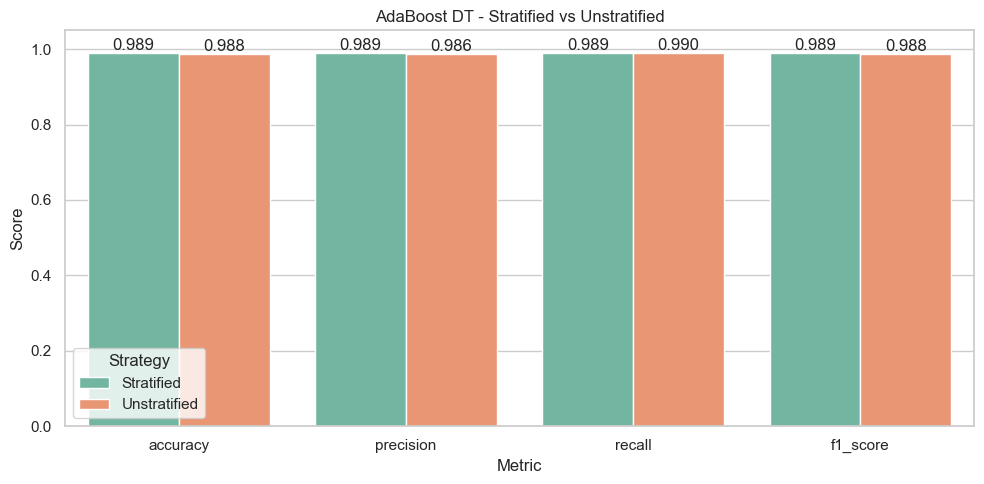

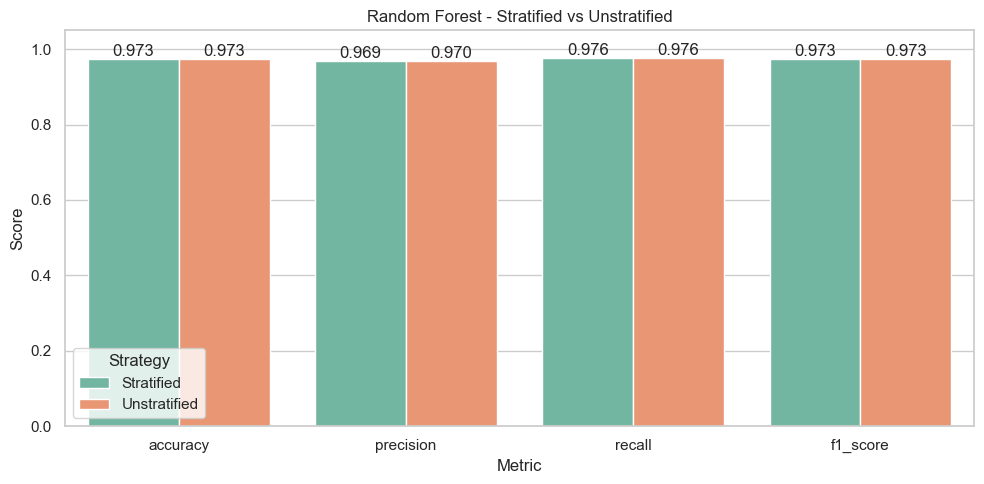

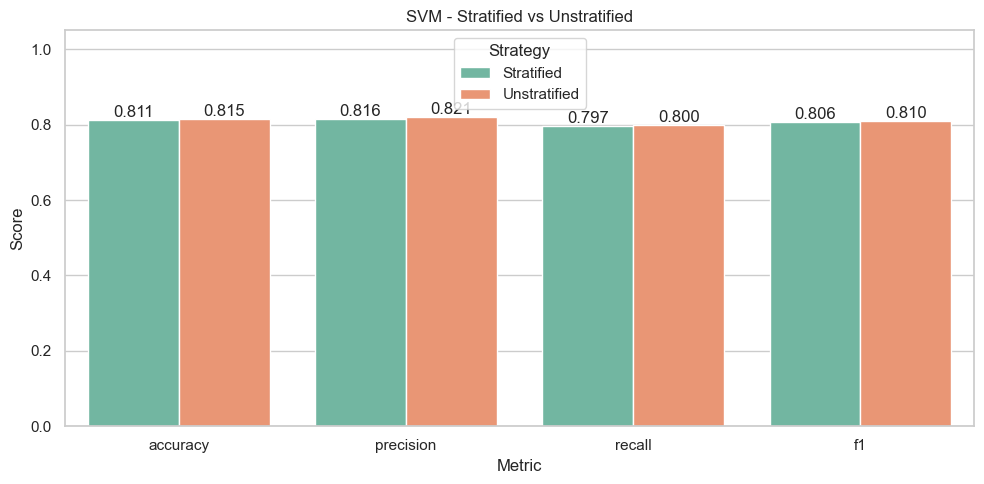

In [60]:
for model in df_all_metrics['Model'].unique():
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=df_all_metrics[df_all_metrics['Model'] == model],
        x='Metric',
        y='Score',
        hue='Strategy',
        palette='Set2',
        dodge=True
    )
    ax.set_title(f'{model} - Stratified vs Unstratified')
    ax.set_ylim(0, 1.05)
    ax.bar_label(ax.containers[0], fmt='%.3f')
    ax.bar_label(ax.containers[1], fmt='%.3f')
    plt.tight_layout()
    plt.show()